# spark_env 가상환경에서의 빅데이터 
# 역할분담으로 인한 시간 절약 

In [2]:
import numpy as np
import time

In [3]:
sc= SparkContext.getOrCreate()   #스파크 이용 하겠다. 

In [4]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [10]:
MAX = 100000

In [11]:
rdd = sc.parallelize([i for i in range(3, MAX+1)],10)
# rdd는 스파크의 인메모리 환경.   # 뒤에 숫자10은 나누어줄 갯수

In [12]:
def get_prime(num):
    isPrime = True
    for index in range(2, num):
        if num% index ==0:
            isPrime == False
            break
            
    if isPrime == True:
        return num

In [13]:
start = time.time()
prime_list = rdd.map(get_prime).collect()  #결과 값을 다 모으는 함수 
end = time.time()
print("소요시간=", end-start)

소요시간= 16.226694345474243


In [14]:
prime_list

[3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,


In [15]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel

In [18]:
df = spark.read.csv( "playtennis.csv", header=True)

In [19]:
type(df)

pyspark.sql.dataframe.DataFrame

In [20]:
df.show()

+--------+-----------+--------+------+----------+
| Outlook|Temperature|Humidity|  Wind|PlayTennis|
+--------+-----------+--------+------+----------+
|   Sunny|        Hot|    High|  Weak|        No|
|   Sunny|        Hot|    High|Strong|        No|
|Overcast|        Hot|    High|  Weak|       Yes|
|    Rain|       Mild|    High|  Weak|       Yes|
|    Rain|       Cool|  Normal|  Weak|       Yes|
|    Rain|       Cool|  Normal|Strong|        No|
|Overcast|       Cool|  Normal|Strong|       Yes|
|   Sunny|       Mild|    High|  Weak|        No|
|   Sunny|       Cool|  Normal|  Weak|       Yes|
|    Rain|       Mild|  Normal|  Weak|       Yes|
|   Sunny|       Mild|  Normal|Strong|       Yes|
|Overcast|       Mild|    High|Strong|       Yes|
|Overcast|        Hot|  Normal|  Weak|       Yes|
|    Rain|       Mild|    High|Strong|        No|
+--------+-----------+--------+------+----------+



In [21]:
from pyspark.sql import functions as F

In [22]:
# df.withColumn : 컬럼 데이터를 수정해서 리턴
# df.withColun("Outlook", "F.when(F.col("Outlook")=="Sunny",0))
# Outlook 컬럼의 값이 Sunny이면 0으로 수정해서 리턴
# otherwise(F.col("Outlook")) : 조건이 거짓이면 Outlook 컬럼의 기존 값 리턴
df = df.withColumn("Outlook", F.when(F.col("Outlook")=="Sunny", 0).otherwise(F.col("Outlook")))
df = df.withColumn("Outlook", F.when(F.col("Outlook")=="Overcast",1).otherwise(F.col("Outlook")))
df = df.withColumn("Outlook", F.when(F.col("Outlook")=="Rain",2).otherwise(F.col("Outlook")))

df = df.withColumn("Temperature", F.when(F.col("Temperature")=="Hot",0).otherwise(F.col("Temperature")))
df = df.withColumn("Temperature", F.when(F.col("Temperature")=="Mild",1).otherwise(F.col("Temperature")))
df = df.withColumn("Temperature", F.when(F.col("Temperature")=="Cool",2).otherwise(F.col("Temperature")))

df = df.withColumn("Humidity", F.when(F.col("Humidity")=="High",0).otherwise(F.col("Humidity")))
df = df.withColumn("Humidity", F.when(F.col("Humidity")=="Normal",1).otherwise(F.col("Humidity")))

df = df.withColumn("Wind", F.when(F.col("Wind")=="Weak",0).otherwise(F.col("Wind")))
df = df.withColumn("Wind", F.when(F.col("Wind")=="Strong",1).otherwise(F.col("Wind")))

df = df.withColumn("PlayTennis", F.when(F.col("PlayTennis")=="No",0).otherwise(F.col("PlayTennis")))
df = df.withColumn("PlayTennis", F.when(F.col("PlayTennis")=="Yes",1).otherwise(F.col("PlayTennis")))

In [24]:
df.show()

+-------+-----------+--------+----+----------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|
+-------+-----------+--------+----+----------+
|      0|          0|       0|   0|         0|
|      0|          0|       0|   1|         0|
|      1|          0|       0|   0|         1|
|      2|          1|       0|   0|         1|
|      2|          2|       1|   0|         1|
|      2|          2|       1|   1|         0|
|      1|          2|       1|   1|         1|
|      0|          1|       0|   0|         0|
|      0|          2|       1|   0|         1|
|      2|          1|       1|   0|         1|
|      0|          1|       1|   1|         1|
|      1|          1|       0|   1|         1|
|      1|          0|       1|   0|         1|
|      2|          1|       0|   1|         0|
+-------+-----------+--------+----+----------+



In [26]:
df.schema          # 컬럼 명, 타입 을 조회하는 함수

StructType(List(StructField(Outlook,StringType,true),StructField(Temperature,StringType,true),StructField(Humidity,StringType,true),StructField(Wind,StringType,true),StructField(PlayTennis,StringType,true)))

In [28]:
df= df.withColumn("Outlook", df["Outlook"].cast('int'))

# withColumn이라는 것은 각 블록을 돌아다니며 새것으로 덮어 씌우는 것으로 이해하면 된다.

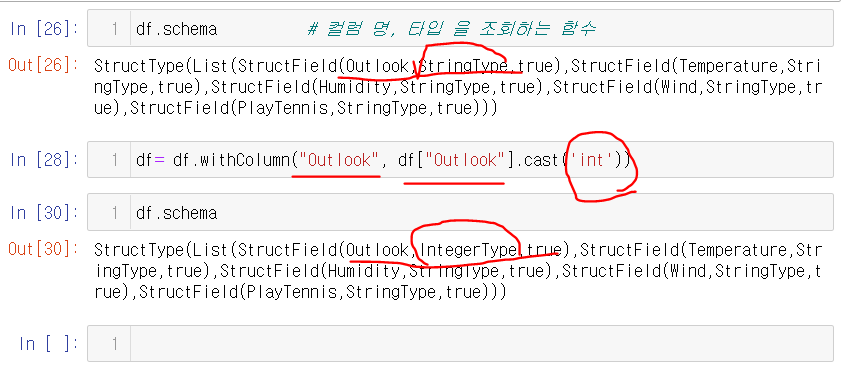

In [39]:
df = df.withColumn("Temperature", df["Temperature"].cast('int'))
df = df.withColumn("Humidity", df["Humidity"].cast('int'))
df = df.withColumn("Wind", df["Wind"].cast('int'))
df = df.withColumn("PlayTennis", df["PlayTennis"].cast('int'))

In [40]:
df.show()

+-------+-----------+--------+----+----------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|
+-------+-----------+--------+----+----------+
|      0|          0|       0|   0|         0|
|      0|          0|       0|   1|         0|
|      1|          0|       0|   0|         1|
|      2|          1|       0|   0|         1|
|      2|          2|       1|   0|         1|
|      2|          2|       1|   1|         0|
|      1|          2|       1|   1|         1|
|      0|          1|       0|   0|         0|
|      0|          2|       1|   0|         1|
|      2|          1|       1|   0|         1|
|      0|          1|       1|   1|         1|
|      1|          1|       0|   1|         1|
|      1|          0|       1|   0|         1|
|      2|          1|       0|   1|         0|
+-------+-----------+--------+----+----------+



# 위에까지의 과정은, 문자를 숫자로, 숫자(str) 타입을 int로 변경해주는 과정이었다

# 이제부터는, spark를 이용한 Decision Tree를 만들어보자

In [41]:
from pyspark.ml.feature import VectorAssembler

In [55]:
assembler = VectorAssembler(inputCols=["Outlook", "Temperature", "Humidity", "Wind"], outputCol="features")

In [56]:
assembler_df = assembler.transform(df)  # assembler의 features 은 위의 inputCols의 컬럼값을 합쳐서 생성됨,

In [57]:
assembler_df.show()

+-------+-----------+--------+----+----------+-----------------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|
+-------+-----------+--------+----+----------+-----------------+
|      0|          0|       0|   0|         0|        (4,[],[])|
|      0|          0|       0|   1|         0|    (4,[3],[1.0])|
|      1|          0|       0|   0|         1|    (4,[0],[1.0])|
|      2|          1|       0|   0|         1|[2.0,1.0,0.0,0.0]|
|      2|          2|       1|   0|         1|[2.0,2.0,1.0,0.0]|
|      2|          2|       1|   1|         0|[2.0,2.0,1.0,1.0]|
|      1|          2|       1|   1|         1|[1.0,2.0,1.0,1.0]|
|      0|          1|       0|   0|         0|    (4,[1],[1.0])|
|      0|          2|       1|   0|         1|[0.0,2.0,1.0,0.0]|
|      2|          1|       1|   0|         1|[2.0,1.0,1.0,0.0]|
|      0|          1|       1|   1|         1|[0.0,1.0,1.0,1.0]|
|      1|          1|       0|   1|         1|[1.0,1.0,0.0,1.0]|
|      1|          0|    

# 여기에서 부터, 데이터를 분리하는 작업

In [64]:
(trainingData, testData) = assembler_df.randomSplit([0.7, 0.3])

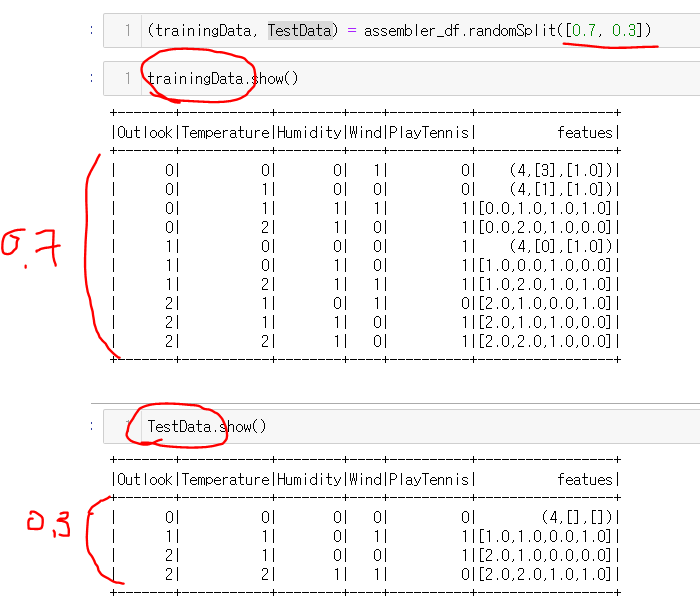

 # Classifier

In [65]:
from pyspark.ml.classification import DecisionTreeClassifier

In [66]:
dt= DecisionTreeClassifier(featuresCol= "features", labelCol = "PlayTennis")

In [67]:
dtModel= dt.fit(trainingData)

In [68]:
prediction= dtModel.transform(testData)

In [69]:
prediction.show()

+-------+-----------+--------+----+----------+-----------------+-------------+-----------+----------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|rawPrediction|probability|prediction|
+-------+-----------+--------+----+----------+-----------------+-------------+-----------+----------+
|      0|          0|       0|   0|         0|        (4,[],[])|    [1.0,0.0]|  [1.0,0.0]|       0.0|
|      1|          1|       0|   1|         1|[1.0,1.0,0.0,1.0]|    [2.0,0.0]|  [1.0,0.0]|       0.0|
|      1|          2|       1|   1|         1|[1.0,2.0,1.0,1.0]|    [2.0,0.0]|  [1.0,0.0]|       0.0|
+-------+-----------+--------+----+----------+-----------------+-------------+-----------+----------+

